In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
game = pd.read_excel('soccer.xlsx', 1)

In [3]:
game.head()

,team,action,pos_x,pos_y
0,Real Madrid,Удар перехваченный,90,52
1,Real Madrid,Удар в створ ворот,95,48
2,Real Madrid,Удар в створ ворот,97,28
3,Real Madrid,Гол,92,40
4,Real Madrid,Удар перехваченный,89,27


In [4]:
game_real = game.query('team == "Real Madrid"')

In [5]:
game_real

,team,action,pos_x,pos_y
0,Real Madrid,Удар перехваченный,90,52
1,Real Madrid,Удар в створ ворот,95,48
2,Real Madrid,Удар в створ ворот,97,28
3,Real Madrid,Гол,92,40
4,Real Madrid,Удар перехваченный,89,27
...,...,...,...,...
6753,Real Madrid,Удар отбитый полевым игроком,101,45
6754,Real Madrid,Удар в створ ворот,77,39
6755,Real Madrid,Удар перехваченный,95,26
6756,Real Madrid,Удар перехваченный,75,37


In [6]:
game_real.loc[:,'hit'] = game_real.loc[:, 'action'].apply(lambda x: 1 if x.startswith('Удар') else 0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [7]:
game_real.loc[:,'goal'] = game_real.loc[:, 'action'].apply(lambda x: 1 if x.startswith('Гол') else 0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
game_real

,team,action,pos_x,pos_y,hit,goal
0,Real Madrid,Удар перехваченный,90,52,1,0
1,Real Madrid,Удар в створ ворот,95,48,1,0
2,Real Madrid,Удар в створ ворот,97,28,1,0
3,Real Madrid,Гол,92,40,0,1
4,Real Madrid,Удар перехваченный,89,27,1,0
...,...,...,...,...,...,...
6753,Real Madrid,Удар отбитый полевым игроком,101,45,1,0
6754,Real Madrid,Удар в створ ворот,77,39,1,0
6755,Real Madrid,Удар перехваченный,95,26,1,0
6756,Real Madrid,Удар перехваченный,75,37,1,0


In [9]:
gamex = game_real

In [10]:
gamex

,team,action,pos_x,pos_y,hit,goal
0,Real Madrid,Удар перехваченный,90,52,1,0
1,Real Madrid,Удар в створ ворот,95,48,1,0
2,Real Madrid,Удар в створ ворот,97,28,1,0
3,Real Madrid,Гол,92,40,0,1
4,Real Madrid,Удар перехваченный,89,27,1,0
...,...,...,...,...,...,...
6753,Real Madrid,Удар отбитый полевым игроком,101,45,1,0
6754,Real Madrid,Удар в створ ворот,77,39,1,0
6755,Real Madrid,Удар перехваченный,95,26,1,0
6756,Real Madrid,Удар перехваченный,75,37,1,0


In [11]:
gamex1 = gamex.groupby(['team', 'pos_x', 'pos_y'], as_index=False) \
    .agg({'hit': 'sum', 'goal': 'sum'})

In [12]:
field = np.zeros(shape=(68,105), dtype=float)

In [13]:
for i in range(len(gamex1.pos_x)):
    field[gamex1.pos_y[i] - 1][gamex1.pos_x[i] - 1] = gamex1.hit[i]

<Figure size 432x288 with 0 Axes>

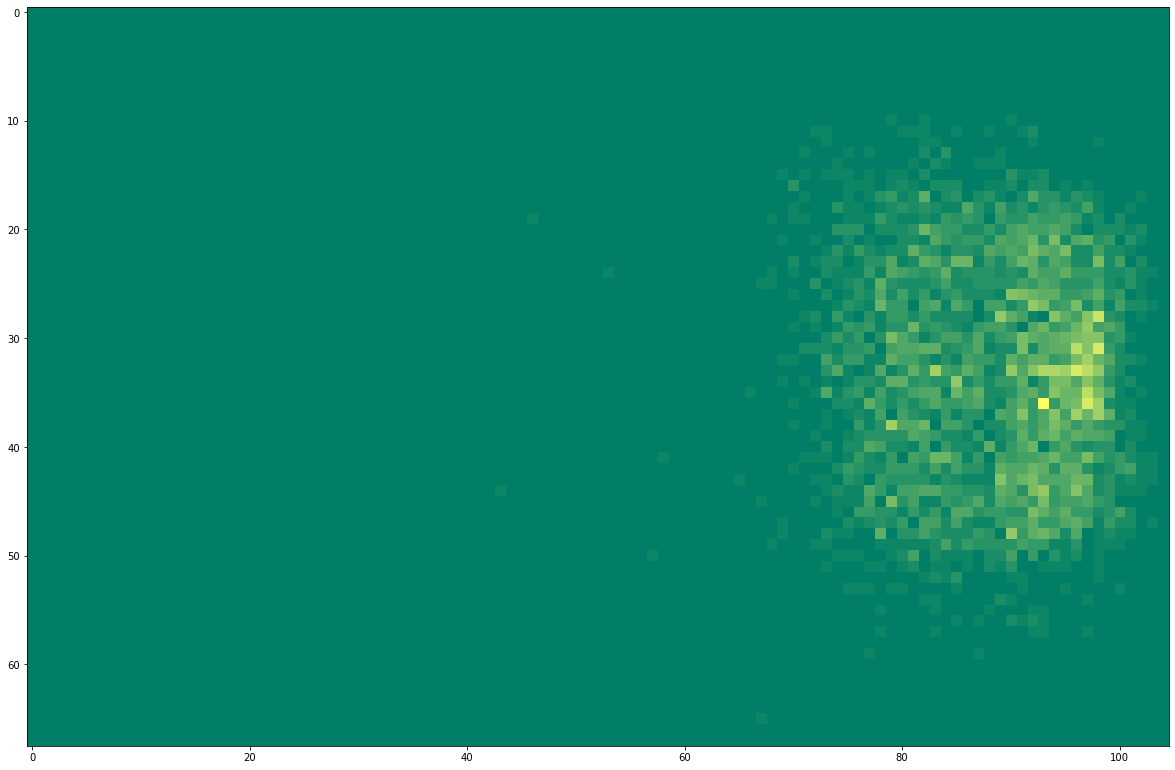

In [14]:
plt.gcf().set_facecolor("green")
plt.figure(figsize=(21,13.6))
plt.imshow(field, cmap='summer', interpolation='nearest')
plt.show()

In [15]:
gamex

,team,action,pos_x,pos_y,hit,goal
0,Real Madrid,Удар перехваченный,90,52,1,0
1,Real Madrid,Удар в створ ворот,95,48,1,0
2,Real Madrid,Удар в створ ворот,97,28,1,0
3,Real Madrid,Гол,92,40,0,1
4,Real Madrid,Удар перехваченный,89,27,1,0
...,...,...,...,...,...,...
6753,Real Madrid,Удар отбитый полевым игроком,101,45,1,0
6754,Real Madrid,Удар в створ ворот,77,39,1,0
6755,Real Madrid,Удар перехваченный,95,26,1,0
6756,Real Madrid,Удар перехваченный,75,37,1,0


In [16]:
gamex = gamex.fillna(0)

In [17]:
gamex.index = [x for x in zip(gamex.pop('pos_x'), gamex.pop('pos_y'))]

In [18]:
gamex.columns

Index(['team', 'action', 'hit', 'goal'], dtype='object')

In [19]:
gamex

,team,action,hit,goal
"(90, 52)",Real Madrid,Удар перехваченный,1,0
"(95, 48)",Real Madrid,Удар в створ ворот,1,0
"(97, 28)",Real Madrid,Удар в створ ворот,1,0
"(92, 40)",Real Madrid,Гол,0,1
"(89, 27)",Real Madrid,Удар перехваченный,1,0
...,...,...,...,...
"(101, 45)",Real Madrid,Удар отбитый полевым игроком,1,0
"(77, 39)",Real Madrid,Удар в створ ворот,1,0
"(95, 26)",Real Madrid,Удар перехваченный,1,0
"(75, 37)",Real Madrid,Удар перехваченный,1,0


In [20]:
gamex.loc[[(96,24)]]

,team,action,hit,goal
"(96, 24)",Real Madrid,Гол,0,1
"(96, 24)",Real Madrid,Удар в створ ворот,1,0
"(96, 24)",Real Madrid,Удар в створ ворот,1,0
"(96, 24)",Real Madrid,Удар мимо,1,0
"(96, 24)",Real Madrid,Удар в створ ворот,1,0
"(96, 24)",Real Madrid,Удар мимо,1,0


In [26]:
field_percent = np.zeros(shape=(68,105), dtype=float)

In [27]:
#fill corner values of the field
for i in gamex.index:
    field_percent[i[1] - 1][i[0] - 1] = sum(gamex.goal.loc[[i]]) /   (field[i[1] - 2][i[0] - 1] + field[i[1] - 2][i[0]]
                                                        + field[i[1] - 1][i[0]] + field[i[1]][i[0]]
                                                        + field[i[1]][i[0] - 1] + field[i[1]][i[0] - 2]
                                                        + field[i[1] - 1][i[0] - 2] + field[i[1] - 2][i[0] - 2])

<ipython-input-27-fa7a69b524b2>:3: RuntimeWarning: invalid value encountered in double_scalars
  field_percent[i[1] - 1][i[0] - 1] = sum(gamex.goal.loc[[i]]) /   (field[i[1] - 2][i[0] - 1] + field[i[1] - 2][i[0]]
<ipython-input-27-fa7a69b524b2>:3: RuntimeWarning: divide by zero encountered in double_scalars
  field_percent[i[1] - 1][i[0] - 1] = sum(gamex.goal.loc[[i]]) /   (field[i[1] - 2][i[0] - 1] + field[i[1] - 2][i[0]]


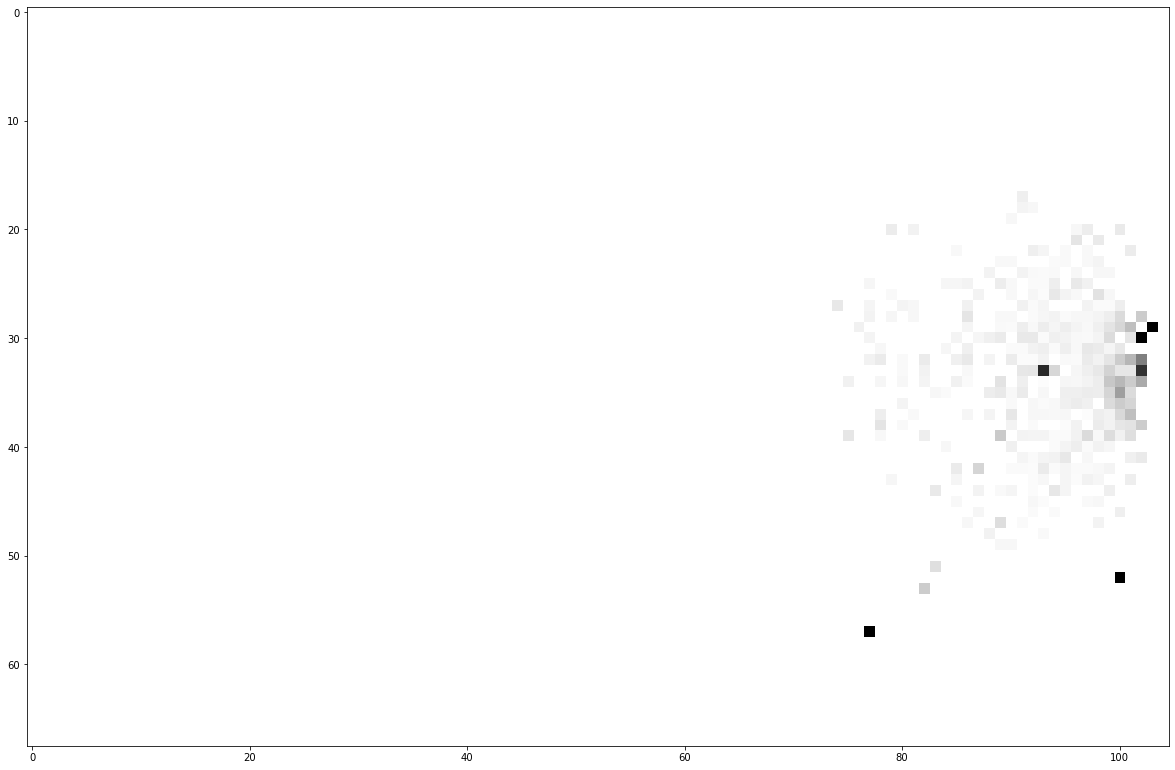

In [28]:
#plt.gcf().set_facecolor("green")
plt.figure(figsize=(21,13.6))
plt.imshow(field_percent, cmap='binary', interpolation='nearest')
plt.show()

In [29]:
field_percent[np.isnan(field_percent)] = 0

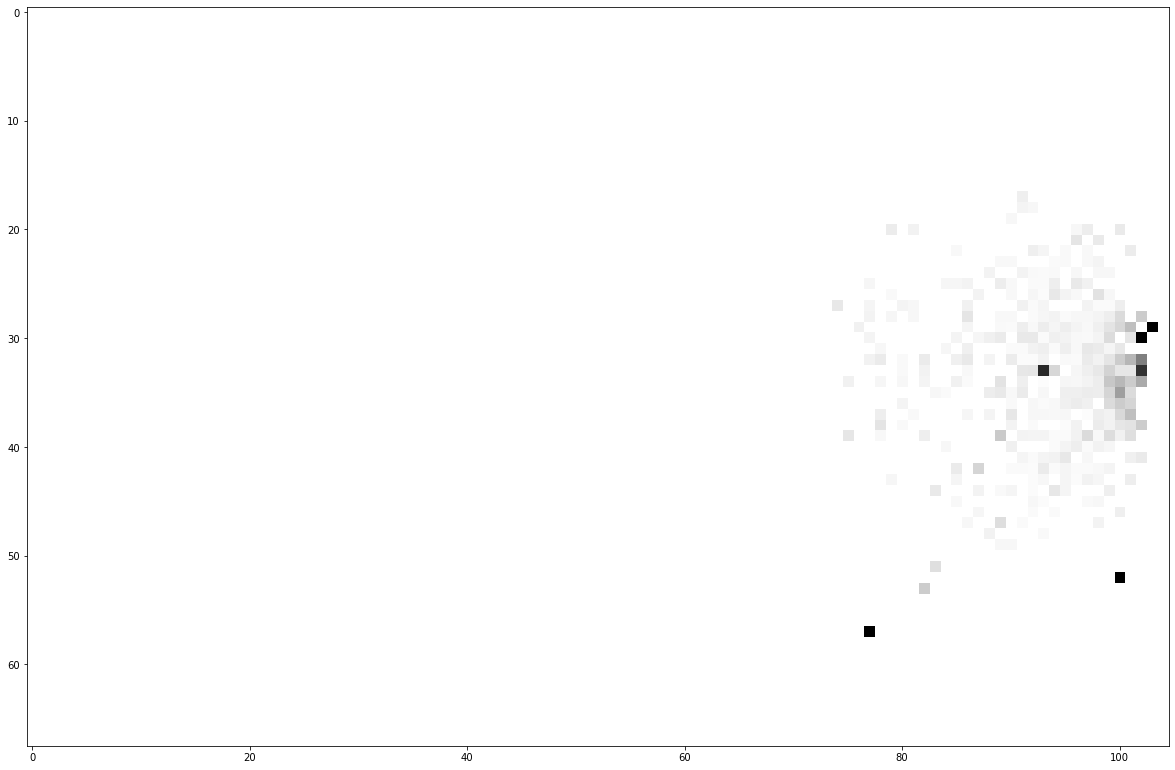

In [36]:
plt.figure(figsize=(21,13.6))
plt.imshow(field_percent, cmap='gist_yarg', interpolation='nearest')
plt.show()

In [31]:
field_percent

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])